1.首先需要设置matplotlib绘图环境

In [13]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

2.导入房价数据。

In [14]:
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


3.显示特征的直方图，观察特征的样本分布。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F8E9E10>,
      dtype=object)

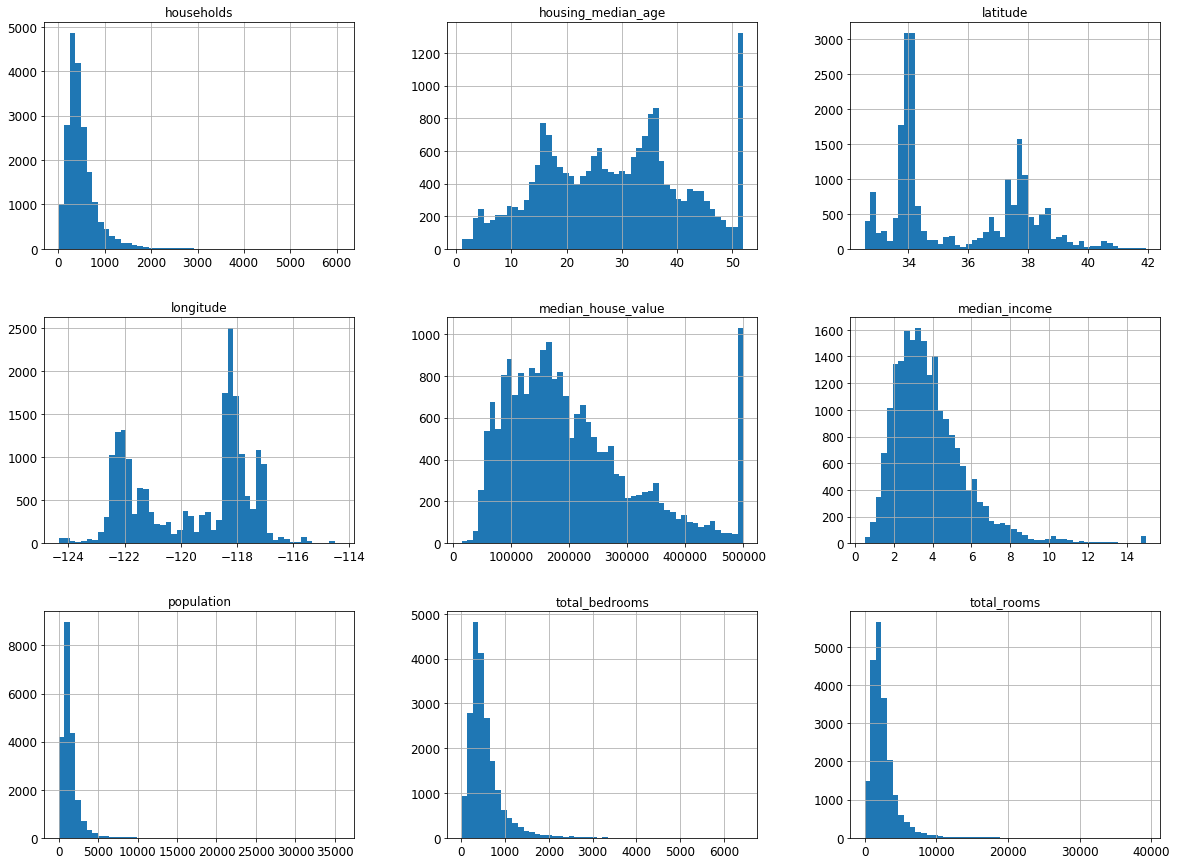

In [17]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

家庭数量（households）呈纺锤形分布，1-800户的家庭数量占样本的大多数，1000-3000户的家庭数量占样本的少数，这反映了家庭密度集中的社区只有少数几个,就是说加州的家庭人口密度集中在某几个区域，属于地广人稀的情况。

房龄（housing_median_age）,1-10年的房子比较少，也就是新建住宅很少；15年-40年房龄的房子占主体，还有1200个以上社区的房龄超过了50年。
纬度（latitude）,可以看到纬度30到35度，37-39度是社区集中的区域。

经度（longitude）,可以看到经度-123到-121度，-119到-117度是社区集中的区域。

房价中位数（median_house_value），房价分布呈纺锤形，随着房价增高，社区数量也越来越少；如果以18万房屋售价作为标准，那么中高房价的房子占了大多数，说明加州的经济还是不错的。

收入中位数（median_income）,该值经过换算，1.8-6是主体，收入和房价的形态差不多，说明人们买房和收入关系很大。

接下来的几个特征，人口（population），房间数量（total_rooms），卧室数量（total_bedrooms）样本形态基本一致，分布比较集中。

4.下面观察特征的相关性。

In [6]:
corr_matrix = housing.corr()

In [7]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

得到的是特征之间的相关性，我们关心的是房价，可以看到，和房价最相关的特征是收入，达到了0.68。（1代表强正相关，-1代表强负相关，0代表没有相关性）；
房龄housing_median_age也有些许的正相关，有0.1；纬度的相关性达到了-0.1，说明了纬度越低房价越高。

5.我们用pandas图形化相关性，展示的特征有收入，房间数，房龄。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BEC8358>,
      dtype=object)

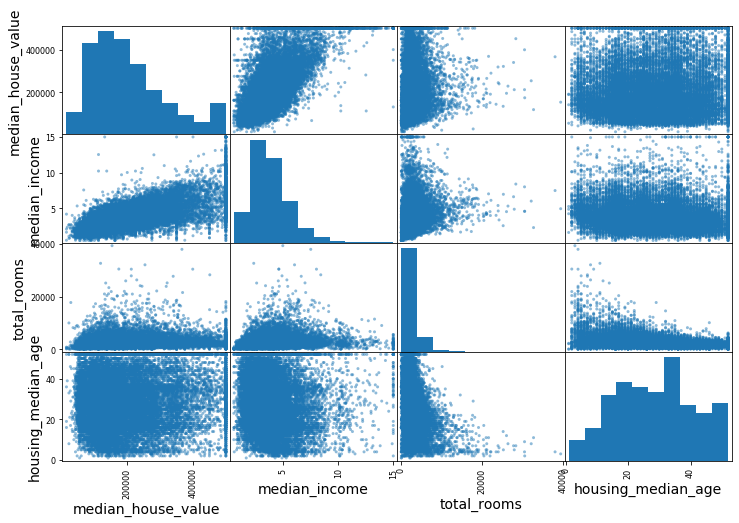

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

中间斜下对角线的图形表示每个特征和自己的相关性，所以都是直线图；我们看到房价和收入有正相关性，因为图形呈明显的
方向性。

6.我们把房价和收入的图放大。

[0, 16, 0, 550000]

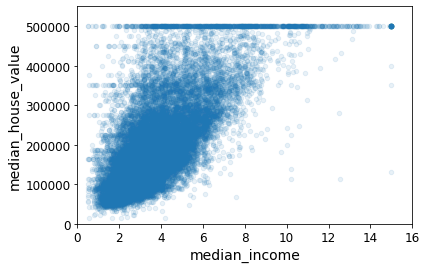

In [10]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

图形呈明显的方向性，并且数据点比较集中。